In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [64]:
!head -n5 data.csv

﻿Current,Current Setting,Current Uncertainty,Voltage,Voltage Setting,Voltage Uncertainty,Resistance
7.71,20,0.057825,1.319,2,0.0032975,171.076524
9.51,20,0.071325,2.01,20,0.01,211.3564669
12.26,20,0.09195,3.37,20,0.01,274.8776509
15.82,20,0.11865,5.28,20,0.0132,333.7547408


In [65]:
current, _, ucurrent, voltage, _, uvoltage, _ = np.loadtxt('data.csv', skiprows=1, delimiter=',', unpack=True)

In [66]:
current /= 1000
ucurrent /= 1000

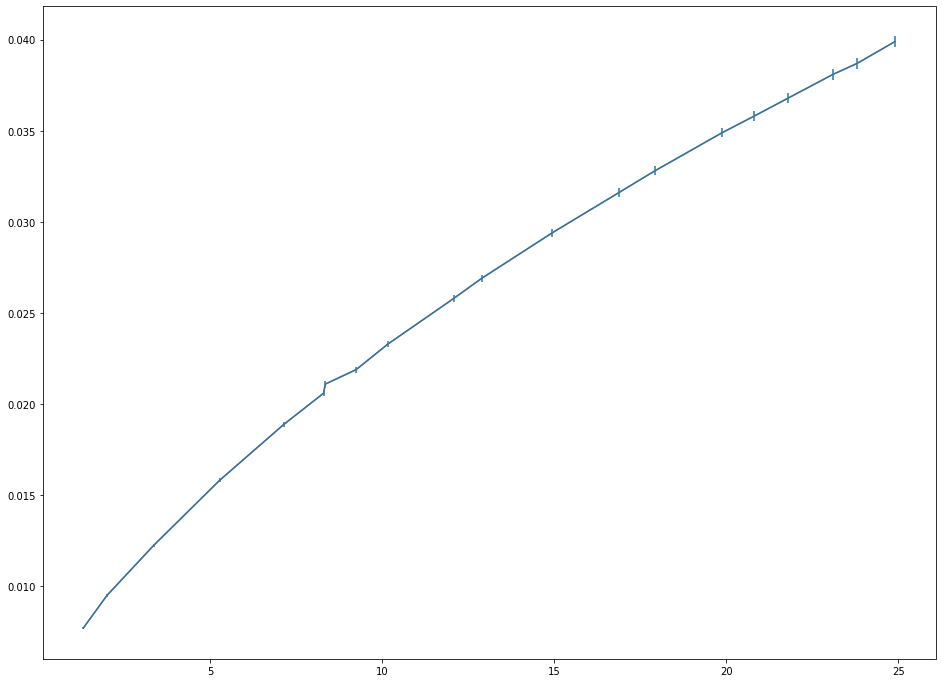

In [67]:
plt.figure(figsize=(16, 12))
plt.errorbar(voltage, current, ucurrent)
plt.plot(voltage, current)

In [69]:
def f(x, a, b):
    return a * x + b

def g(x, a, b):
    return a * np.power(x, b)

def t(x):
    return np.power(x, 0.5882) 

def rcs(pred, target, uncertainty, n_params):
    return np.square((pred - target) / uncertainty).sum() / (pred.size - n_params)

In [11]:
popt, pcov = curve_fit(f, np.log(voltage), np.log(current), sigma=ucurrent, absolute_sigma=True)

In [37]:
popt2

array([0.00628338, 0.57024502])

<ErrorbarContainer object of 3 artists>

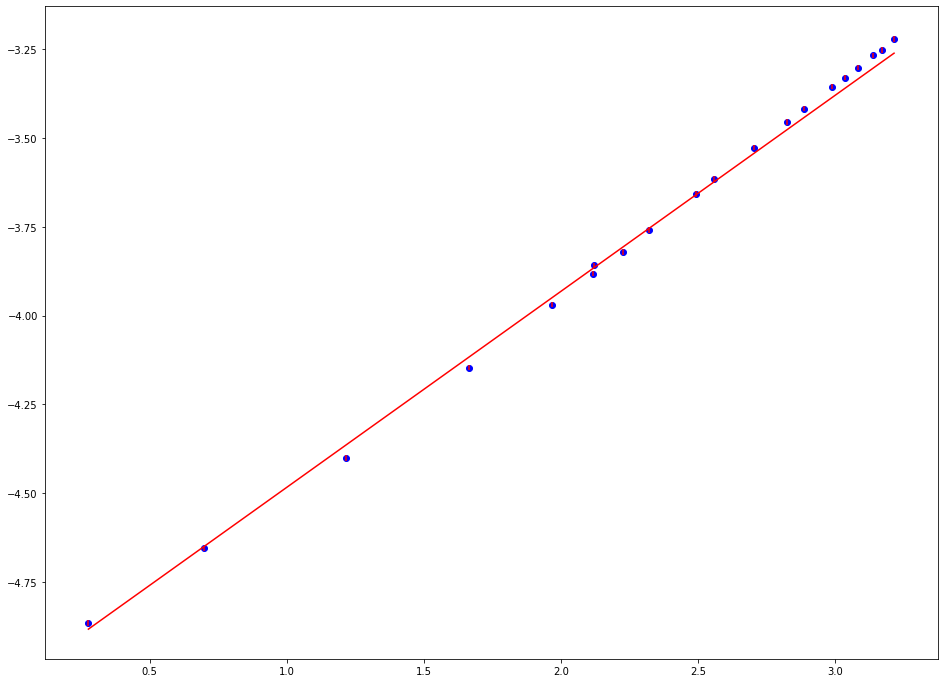

In [30]:
plt.figure(figsize=(16, 12))
plt.plot(np.log(voltage), f(np.log(voltage), *popt), c='r')
plt.scatter(np.log(voltage), np.log(current), c='b')
plt.errorbar(np.log(voltage), np.log(current), yerr=np.abs(ucurrent / current), c='r', ls='')

In [23]:
popt2, pcov2 = curve_fit(g, voltage, current, sigma=ucurrent, absolute_sigma=True)

In [58]:
popt2

array([0.00628338, 0.57024502])

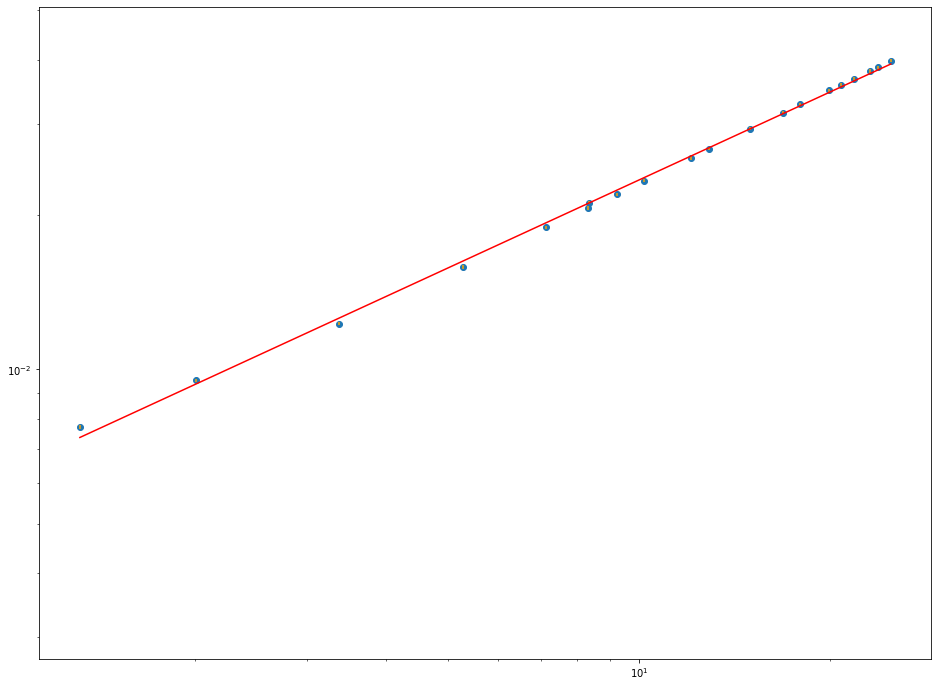

In [29]:
plt.figure(figsize=(16, 12))
plt.scatter(voltage, current)
plt.plot(voltage, g(voltage, *popt2), c='r')
plt.errorbar(voltage, current, ucurrent, c='orange', ls='')
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'Current')

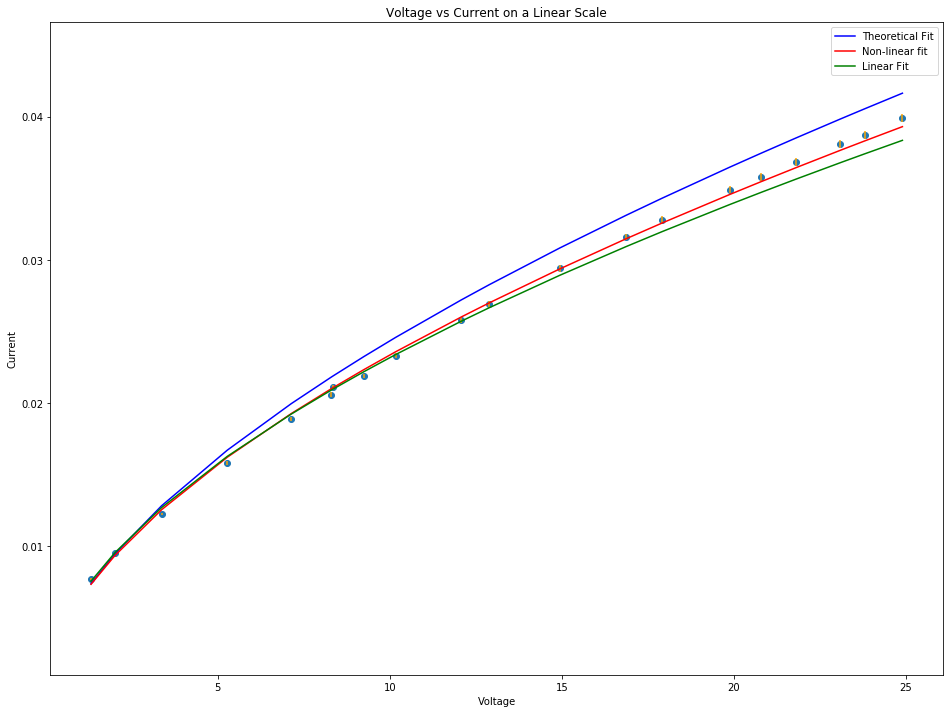

In [62]:
plt.figure(figsize=(16, 12))
plt.scatter(voltage, current)
plt.plot(voltage, popt2[0] * t(voltage), c='b', label='Theoretical Fit')
plt.plot(voltage, g(voltage, *popt2), c='r', label='Non-linear fit')
plt.plot(voltage, np.exp(f(np.log(voltage), *popt)), c='g', label='Linear Fit')
plt.errorbar(voltage, current, ucurrent, c='orange', ls='')
plt.legend()
plt.title('Voltage vs Current on a Linear Scale')
plt.xlabel('Voltage')
plt.ylabel('Current')

Text(0, 0.5, 'Current')

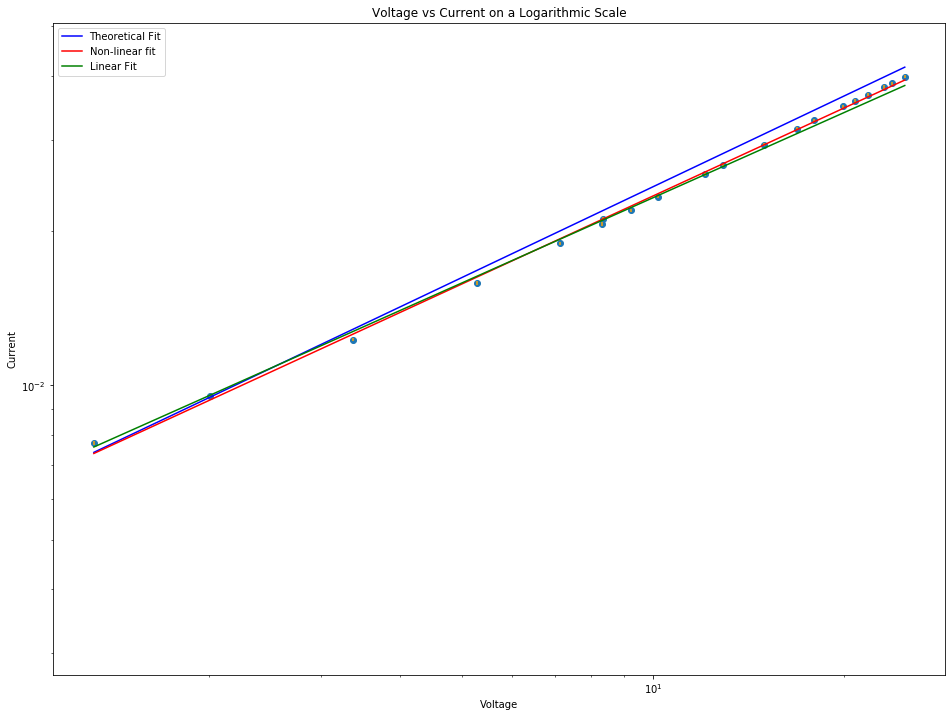

In [61]:
plt.figure(figsize=(16, 12))
plt.scatter(voltage, current)
plt.plot(voltage, popt2[0] * t(voltage), c='b', label='Theoretical Fit')
plt.plot(voltage, g(voltage, *popt2), c='r', label='Non-linear fit')
plt.plot(voltage, np.exp(f(np.log(voltage), *popt)), c='g', label='Linear Fit')
plt.errorbar(voltage, current, ucurrent, c='orange', ls='')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Voltage vs Current on a Logarithmic Scale')
plt.xlabel('Voltage')
plt.ylabel('Current')

In [85]:
print(rcs(g(voltage, *popt2), current, ucurrent, 2), np.sqrt(np.diag(pcov2)), popt2)
print(rcs(np.exp(f(np.log(voltage), *popt)), current, ucurrent, 2), np.sqrt(np.diag(pcov)), popt)
print(rcs(popt2[0] * t(voltage), current, ucurrent, 2))

5.83105629036604 [3.25652871e-05 2.10005714e-03] [0.00628338 0.57024502]
11.350422733369072 [3.18655404e-05 5.25137566e-05] [ 0.55198273 -5.03575564]
46.49261562621879
